# Keras-TensorFlow example 
Keras is a high-level neural network library that, among many other things, wraps an API similar to scikit-learn's around the Theano or TensorFlow backends. This example uses the TensorFlow backend.

In [239]:
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

### Let's import the IRIS dataset:
The iris dataset is built into many machine learning libraries.The copy in the seaborn library includes as a labelled dataframe that can be easily visualized.

In [240]:
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


As you can see, each example (i.e., flower) in the dataset has four features, which are standard measurements of the flower's size in centimeters. There is also a label (the fifth field in the table), which is is the species of iris. There are three species: setosa, verscicolor and virginica. 
Let's build a classifier that, given the two petal and two sepal measurements, can predict the species of an iris. 

### Let's do some DataViz:
It is always a good idea to do a quick visualization before building the model and the Seaborn library is our friend:

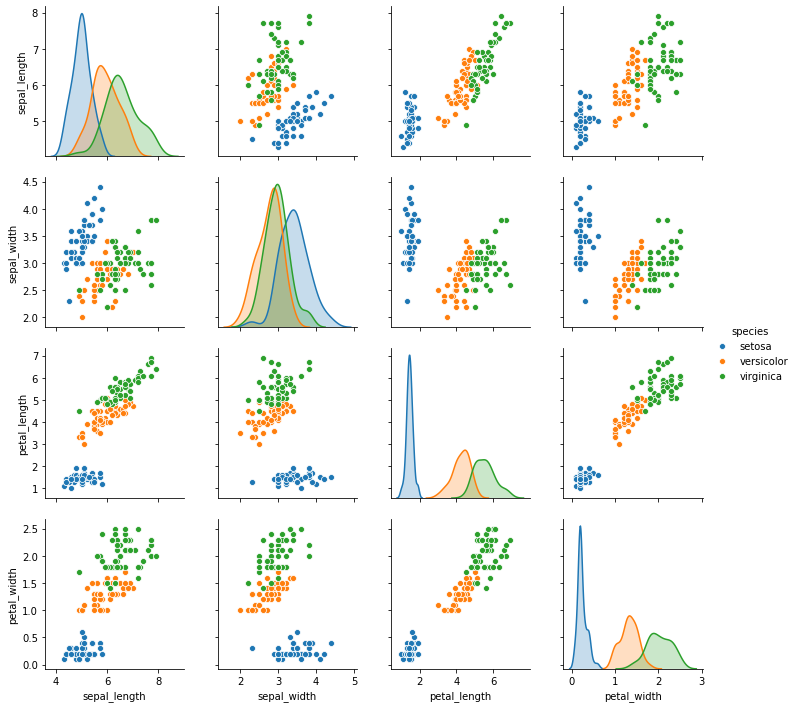

In [241]:
sns.pairplot(iris, hue='species');

## Let's start building the model:
The first step is to split the dataset into two subsets: one for training (with the labels) and one for validation (without labels). We will use the ```train_test_split()``` method of the scikit-learn library. We first need to keep the features (the petal and sepal data) in a separated array from the labels. Array X will contain characteristics and array Y the labels.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for more info.

In [242]:
X = iris.values[:, :4]
y = iris.values[:, 4]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [243]:
train_X[:5,:]

array([[5.0, 2.0, 3.5, 1.0],
       [6.5, 3.0, 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6.0, 2.2, 5.0, 1.5],
       [6.7, 2.5, 5.8, 1.8]], dtype=object)

In [244]:
train_y[:5]

array(['versicolor', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

Since Keras requires that labels be one-hot-encoded, we need to convert data so "setosa" should be (1, 0, 0), "versicolor" should be (0, 1, 0) and "virginica" should be (0, 0, 1). We'll use the NumPy library for that:

In [245]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

#### The neural network model:
Let's specify the structure of the model before we can instantiate and use it. We will use the "Sequential" modelling, which is the easiest one and consists of a sequential stack of defined layers in the neural network. 

Since there are four features and three classes of labels the input layer must have four units, and the output layer must have three units. 

In [246]:
model = Sequential()
model.add(Dense(32, input_shape=(4,)))
model.add(Activation('softmax'))

Let's add a single hidden layer for this model with a SoftMax activation funtion:

In [247]:
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

Let's use the Cross-Entropy for categorical data as loss funcion to optimize (since the labels are categorical data despite we've hot-encoded them) with the Adam optimizer. We also get the accuracy during the training phase and use the Early Stopping callback methid to avoid unnecesary epochs.

In [248]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [249]:
metrics = model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=1, callbacks = [EarlyStopping(monitor='loss', patience=3)]);

Epoch 1/100
105/105 [==============================] - 2s 18ms/step - loss: 1.0814 - accuracy: 0.3714
Epoch 2/100
105/105 [==============================] - 1s 7ms/step - loss: 1.0125 - accuracy: 0.6286
Epoch 3/100
105/105 [==============================] - 1s 7ms/step - loss: 0.8261 - accuracy: 0.7238
Epoch 4/100
105/105 [==============================] - 1s 7ms/step - loss: 0.6328 - accuracy: 0.7810
Epoch 5/100
105/105 [==============================] - 1s 7ms/step - loss: 0.4792 - accuracy: 0.8667
Epoch 6/100
105/105 [==============================] - 1s 7ms/step - loss: 0.3803 - accuracy: 0.9143
Epoch 7/100
105/105 [==============================] - 1s 7ms/step - loss: 0.3041 - accuracy: 0.9238
Epoch 8/100
105/105 [==============================] - 1s 7ms/step - loss: 0.2550 - accuracy: 0.9238
Epoch 9/100
105/105 [==============================] - 1s 7ms/step - loss: 0.2180 - accuracy: 0.9333
Epoch 10/100
105/105 [==============================] - 1s 7ms/step - loss: 0.1887 - accur

In [250]:
loss, accuracy = model.evaluate(test_X, test_y_ohe)
print("Model's ACCURACY = {:.2f}".format(accuracy))

45/45 [==============================] - 1s 21ms/step
Model's ACCURACY = 0.98


#### The Model's metrics:
Let's plot the performace metrics of this model to see how the loss function decreases and the accuracy improves across the epochs:

Text(0.5, 1.0, 'Accuracy')

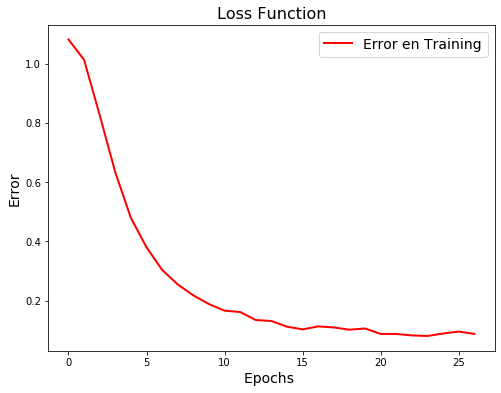

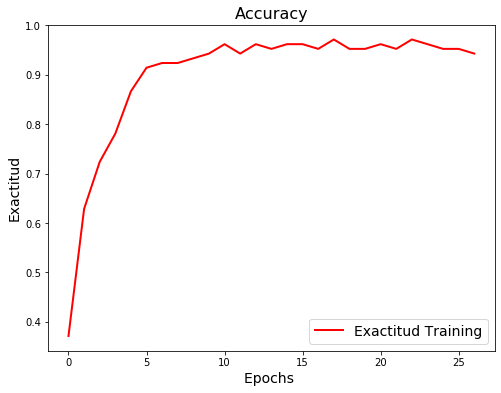

In [251]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model
import matplotlib.pyplot as plt
%matplotlib inline

plot_model(model, to_file='modelo_base.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Loss Function plot
plt.figure(figsize=[8,6])
plt.plot(metrics.history['loss'],'r',linewidth=2.0)
plt.legend(['Error en Training'],fontsize=14)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Error',fontsize=14)
plt.title('Loss Function',fontsize=16)
# Accuracy plot
plt.figure(figsize=[8,6])
plt.plot(metrics.history['accuracy'],'r',linewidth=2.0)
plt.legend(['Exactitud Training'],fontsize=14)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Exactitud',fontsize=14)
plt.title('Accuracy',fontsize=16)


#### The Model's summary and save for future use (inference phase):
Let's summarize the layers of our model and save it to a file for future use in the inference (classification) phase...

In [253]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_48 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_63 (Dense)             (None, 3)                 51        
_________________________________________________________________
activation_49 (Activation)   (None, 3)                 0         
Total params: 1,795
Trainable params: 1,795
Non-trainable params: 0
___________________________________________________

In [254]:
model.save('model.h5')